# Parameterized $U_{ZZ}$ benchmarking data and analysis

In [35]:
import json
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from parameterized_RB import *

## load 2Q parameterized RB data from json files

In [36]:
with open('data/theta_2e-4.json', 'r') as f:
    TQRB_theta0 = json.load(f)
    
with open('data/theta_0.125.json', 'r') as f:
    TQRB_theta1 = json.load(f)
    
with open('data/theta_0.25.json', 'r') as f:
    TQRB_theta2 = json.load(f)
    
with open('data/theta_0.375.json', 'r') as f:
    TQRB_theta3 = json.load(f)
    
with open('data/theta_0.5.json', 'r') as f:
    TQRB_theta4 = json.load(f)

## process data and plot decay curves of direct RB

/Users/H266496/opt/anaconda3/envs/qenv/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


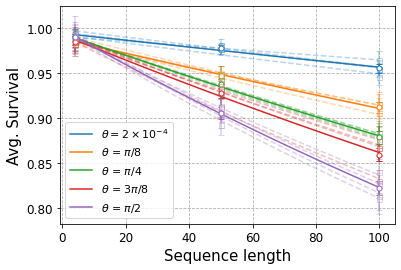

In [37]:
exp_list = [TQRB_theta0, TQRB_theta1, TQRB_theta2, TQRB_theta3, TQRB_theta4]
Results = []

x = [4, 50, 100]

def fit_func(xvals, params):
    
    return params[0]*params[1]**np.array(xvals) + 1/4

def fit_fun(x, a, b):
    
    return a*b**x + 1/4

label_list = ['(a)', '(b)', '(c)', '(d)', '(e)']
label_y_coordinates = [1.01, 1.015, 1.02, 1.02, 1.025]
ZZ_angles = [2e-4, 0.125, 0.25, 0.375, 0.5]

fig, ax = plt.subplots(1,1)
for exp_num, exp in enumerate(exp_list):
    
    if exp_num == 0:
        fit_method = 2
    else:
        fit_method = 1
    
    hists = retrieve(exp)
    results = analyze_hists(hists, fit_method=fit_method)
    Results.append(results)

    data = {'DG01': results['avg_success_probs'][0],
           'DG02': results['avg_success_probs'][1],
           'DG03': results['avg_success_probs'][2],
           'DG04': results['avg_success_probs'][3],
           'Combined':{L:np.mean([results['avg_success_probs'][j][L] for j in range(4)]) for L in x}}

    # uncertainty (errorbars in plot)
    uncertainty = {'DG01': results['error_data'][0]['success_probs_stds'],
                   'DG02': results['error_data'][1]['success_probs_stds'],
                   'DG03': results['error_data'][2]['success_probs_stds'],
                   'DG04': results['error_data'][3]['success_probs_stds'],
                  'Combined':{L:np.sqrt(np.sum([s**2 for s in [results['error_data'][j]['success_probs_stds'][L] for j in range(4)]]))/4 for L in x}}


    y1 = list(results['avg_success_probs'][0].values())
    y2 = list(results['avg_success_probs'][1].values())
    y3 = list(results['avg_success_probs'][2].values())
    y4 = list(results['avg_success_probs'][3].values())
    y = list({L:np.mean([results['avg_success_probs'][j][L] for j in range(4)]) for L in x}.values())

    popt1, pcov1 = curve_fit(fit_fun, x, y1, p0=[0.9, 0.9], bounds=(0,1))
    popt2, pcov2 = curve_fit(fit_fun, x, y2, p0=[0.9, 0.9], bounds=(0,1))
    popt3, pcov3 = curve_fit(fit_fun, x, y3, p0=[0.9, 0.9], bounds=(0,1))
    popt4, pcov4 = curve_fit(fit_fun, x, y4, p0=[0.9, 0.9], bounds=(0,1))
    popt, pcov = curve_fit(fit_fun, x, y, p0=[0.9, 0.9], bounds=(0,1))

    # fit parameters (used in fit_func above)
    fit = {'DG01': list(popt1), 'DG02': list(popt2), 'DG03': list(popt3), 'DG04': list(popt4), 'Combined':list(popt)}

    # make list for solid line in plot
    line_xvals = {
        name: np.arange(np.min(list(vals.keys())), np.max(list(vals.keys())), 0.1)
        for name, vals in data.items()
    }
    line_yvals = {
        name: fit_func(line_xvals[name], fit[name])
        for name, vals in data.items()
    }
    
    # plot decay
    fig.set_facecolor('white')
    
    linestyle = '--'
    alpha = 0.3
    marker = 'o'
    color_list = [plt.get_cmap("tab10").colors[i] for i in range(10)]

    for i, name in enumerate(data):
        if name == 'Combined':
            ax.plot(line_xvals[name], line_yvals[name], "-", color=plt.get_cmap("tab10").colors[exp_num])
            for length in data[name]:
                ax.errorbar(
                    length,
                    np.mean(data[name][length]),
                    yerr=uncertainty[name][length],
                    fmt="o",
                    markersize=5,
                    capsize=3,
                    ecolor=plt.get_cmap("tab10").colors[exp_num],
                    markerfacecolor=[1, 1, 1],
                    markeredgecolor=plt.get_cmap("tab10").colors[exp_num],
                    label='_nolegend_'
                )
        else:
            ax.plot(line_xvals[name], line_yvals[name], "--", color=color_list[exp_num], alpha=alpha, label='_nolegend_')
            for length in data[name]:
                ax.errorbar(
                    length,
                    np.mean(data[name][length]),
                    yerr=uncertainty[name][length],
                    fmt="s",
                    markersize=5,
                    capsize=3,
                    ecolor=color_list[exp_num],
                    alpha=alpha,
                    markerfacecolor=[1, 1, 1],
                    markeredgecolor=color_list[exp_num],
                    label='_nolegend_'
                )

    legend = list(data.keys())

    ZZ_angle = ZZ_angles[exp_num]

    ax.grid(visible=True, axis="both", linestyle="--")
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel("Sequence length", fontsize=15)
    ax.set_ylabel("Avg. Survival",  fontsize=15)
    ax.legend(['${\\theta} = 2 \\times 10^{-4}$', '${\\theta}$ = $\\pi$/8', '${\\theta}$ = $\\pi$/4', '${\\theta}$ = 3$\\pi$/8', '${\\theta}$ = $\\pi$/2'], fontsize=11)
    # fig.savefig("arbrb_combined.pdf", bbox_inches="tight", format="pdf")

/var/folders/8c/x6x13_8x14v7hxh6jtck57_r0000gp/T/ipykernel_37429/4171278027.py:110: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, axis="both", linestyle="--")


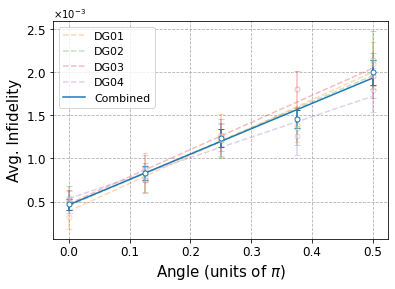

In [38]:
# make plot of fidelity versus angle

x = [0, 0.125, 0.25, 0.375, 0.5]

y = [1 - np.mean(Results[j]['f_avg']) for j in range(5)]
y0 = [1 - Results[j]['f_avg'][0] for j in range(5)]
y1 = [1 - Results[j]['f_avg'][1] for j in range(5)]
y2 = [1 - Results[j]['f_avg'][2] for j in range(5)]
y3 = [1 - Results[j]['f_avg'][3] for j in range(5)]

data = {
    'DG01': {x[j]:1-Results[j]['f_avg'][0] for j in range(5)},
    'DG02': {x[j]:1-Results[j]['f_avg'][1] for j in range(5)},
    'DG03': {x[j]:1-Results[j]['f_avg'][2] for j in range(5)},
    'DG04': {x[j]:1-Results[j]['f_avg'][3] for j in range(5)},
    'Combined': {x[j]:1-np.mean(Results[j]['f_avg']) for j in range(5)}
}

# uncertainty (errorbars in plot)
uncertainty = {
    'DG01': {x[j]:Results[j]['error_data'][0]['avg_fid_std'] for j in range(5)},
    'DG02': {x[j]:Results[j]['error_data'][1]['avg_fid_std'] for j in range(5)},
    'DG03': {x[j]:Results[j]['error_data'][2]['avg_fid_std'] for j in range(5)},
    'DG04': {x[j]:Results[j]['error_data'][3]['avg_fid_std'] for j in range(5)},
    'Combined': {x[j]:np.sqrt(np.sum([s['avg_fid_std']**2 for s in Results[j]['error_data']]))/4 for j in range(5)}
}

def fit_fun(x, a, b):
    return a*x+b

popt, pcov = curve_fit(fit_fun, x, y)
popt0, pcov0 = curve_fit(fit_fun, x, y0)
popt1, pcov1 = curve_fit(fit_fun, x, y1)
popt2, pcov2 = curve_fit(fit_fun, x, y2)
popt3, pcov3 = curve_fit(fit_fun, x, y3)

# fit funciton (solid line in plot)
def fit_func(xvals, params):
    
    return params[0]*np.array(xvals) + params[1]


# fit parameters (used in fit_func above)
fit = {
    'DG01': [popt0[0], popt0[1]],
    'DG02': [popt1[0], popt1[1]],
    'DG03': [popt2[0], popt2[1]],
    'DG04': [popt3[0], popt3[1]],
    'Combined': [popt[0], popt[1]]
}

# make list for solid line in plot
line_xvals = {
    name: np.arange(np.min(list(vals.keys())), np.max(list(vals.keys())), 0.002)
    for name, vals in data.items()
}
line_yvals = {
    name: fit_func(line_xvals[name], fit[name])
    for name, vals in data.items()
}

fig, ax = plt.subplots(1,1)
fig.set_facecolor('white')


alpha = 0.3
marker = 'o'
color_list = [plt.get_cmap("tab10").colors[i] for i in range(1,10)]


for i, name in enumerate(data):
    if name == 'Combined':
        ax.plot(line_xvals[name], line_yvals[name], "-", color=plt.get_cmap("tab10").colors[0])
        for length in data[name]:
            ax.errorbar(
                length,
                np.mean(data[name][length]),
                yerr=uncertainty[name][length],
                fmt="o",
                markersize=5,
                capsize=3,
                ecolor=plt.get_cmap("tab10").colors[0],
                markerfacecolor=[1, 1, 1],
                markeredgecolor=plt.get_cmap("tab10").colors[0],
            )
    else:
        ax.plot(line_xvals[name], line_yvals[name], "--", color=color_list[i], alpha=alpha)
        for length in data[name]:
            ax.errorbar(
                length,
                np.mean(data[name][length]),
                yerr=uncertainty[name][length],
                fmt="o",
                markersize=5,
                capsize=3,
                ecolor=color_list[i],
                alpha=alpha,
                markerfacecolor=[1, 1, 1],
                markeredgecolor=color_list[i],
            )

legend = list(data.keys())

ax.grid(visible=True, axis="both", linestyle="--")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Angle (units of $\\pi$)", fontsize=15)
ax.set_ylabel("Avg. Infidelity",  fontsize=15)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
ax.legend(legend, fontsize=11)
# fig.savefig("fid_versus_angle" + ".pdf", bbox_inches="tight", format="pdf")

<div align="center"> &copy; 2023 by Quantinuum. All Rights Reserved. </div>